### Project Setup

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, Binarizer, scale, OneHotEncoder, LabelEncoder
import matplotlib.pyplot as plt
import numpy as np

### Read the data

In [2]:
data = pd.read_csv('wine+quality/winequality-red.csv', sep=';')

### Normalization

#### Rescaling data

* **En version**: This code snippet uses the MinMaxScaler function to normalize the data in the 'data' dataframe to a range between 0 and 1. This is done to ensure that all the characteristics of the data are on the same scale, preventing some from having a greater influence on the machine learning models due to their larger magnitudes

* **Pt version**: Esse trecho de código utiliza a função MinMaxScaler para normalizar os dados no dataframe 'data' para um intervalo entre 0 e 1. Isso é feito para garantir que todas as características dos dados estejam na mesma escala, evitando que algumas tenham maior influência nos modelos de aprendizado de máquina devido a suas magnitudes maiores

In [17]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)
#scaled_data = pd.DataFrame(scaled_data, columns=data.columns)
#scaled_data

array([[0.24778761, 0.39726027, 0.        , ..., 0.13772455, 0.15384615,
        0.4       ],
       [0.28318584, 0.52054795, 0.        , ..., 0.20958084, 0.21538462,
        0.4       ],
       [0.28318584, 0.43835616, 0.04      , ..., 0.19161677, 0.21538462,
        0.4       ],
       ...,
       [0.15044248, 0.26712329, 0.13      , ..., 0.25149701, 0.4       ,
        0.6       ],
       [0.11504425, 0.35958904, 0.12      , ..., 0.22754491, 0.27692308,
        0.4       ],
       [0.12389381, 0.13013699, 0.47      , ..., 0.19760479, 0.4       ,
        0.6       ]])

#### Standardizing data

* **En version**:This code snippet creates a set of characteristics by selecting columns 0 to 7 of the 'scaled_data' DataFrame. It then uses a 'StandardScaler' object to standardize (or normalize) these characteristics, adjusting the scaler to the selected data and transforming these characteristics to a new scale using the 'transform' method.

* **Pt version**:Esse trecho de código cria um conjunto de características selecionando as colunas de 0 a 7 do DataFrame 'scaled_data'. Em seguida, utiliza um objeto 'StandardScaler' para padronizar (ou normalizar) essas características, ajustando o scaler aos dados selecionados e transformando essas características para uma nova escala por meio do método 'transform'.

In [4]:
features = scaled_data[:, 0:8]
scaler = StandardScaler().fit(features)
rescaledFeatures = scaler.transform(features)

#### Normalizing data

In [5]:
scaler = Normalizer().fit(features)
normalizedFeatures = scaler.transform(features)

#### Binarizing data

In [6]:
binarizer = Binarizer(threshold=0.0).fit(features)
binaryFeatures = binarizer.transform(features)

#### Mean removal

In [7]:
data_standardized = scale(data)

#### OneHotEncoding

In [8]:
encoder = OneHotEncoder()

encoder = OneHotEncoder(handle_unknown='ignore')
encoder.fit([[0,1,6,2],
              [1,5,3,5],
              [2,4,2,7],
              [1,0,4,2]])


encoder.transform([[2,4,3,4]]).toarray()


array([[0., 0., 1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.]])

#### Label Enccoding

In [9]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
input_classes=['Havells','Philips','Syska','Eveready','Lloyd']
label_encoder.fit(input_classes)

for i,item in enumerate(label_encoder.classes_):
    print(item,'-->',i)

labels=['Lloyd','Syska','Philips']
label_encoder.transform(labels)
label_encoder.inverse_transform(label_encoder.transform(labels))


Eveready --> 0
Havells --> 1
Lloyd --> 2
Philips --> 3
Syska --> 4


array(['Lloyd', 'Syska', 'Philips'], dtype='<U8')

### Analyzing

#### Describing

In [10]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


#### Shape

In [11]:
data.shape

(1599, 12)

### Visualizing Data

#### Histograms

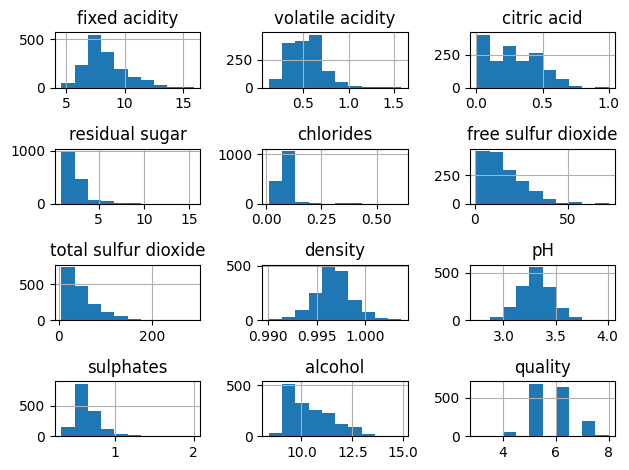

In [12]:
data.hist()
plt.tight_layout()
plt.show()


#### Density

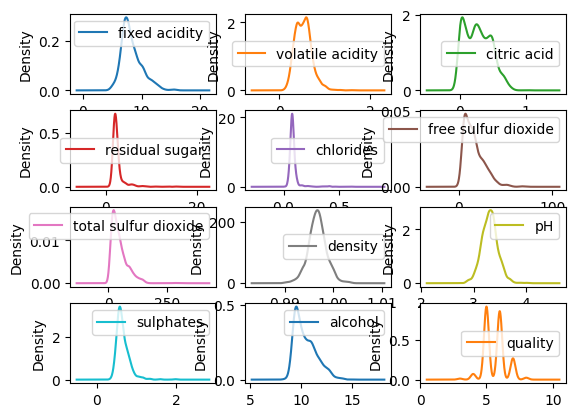

In [13]:
data.plot(kind='density', subplots=True, layout=(4,3), sharex=False)
plt.show()

#### Box and Whisper

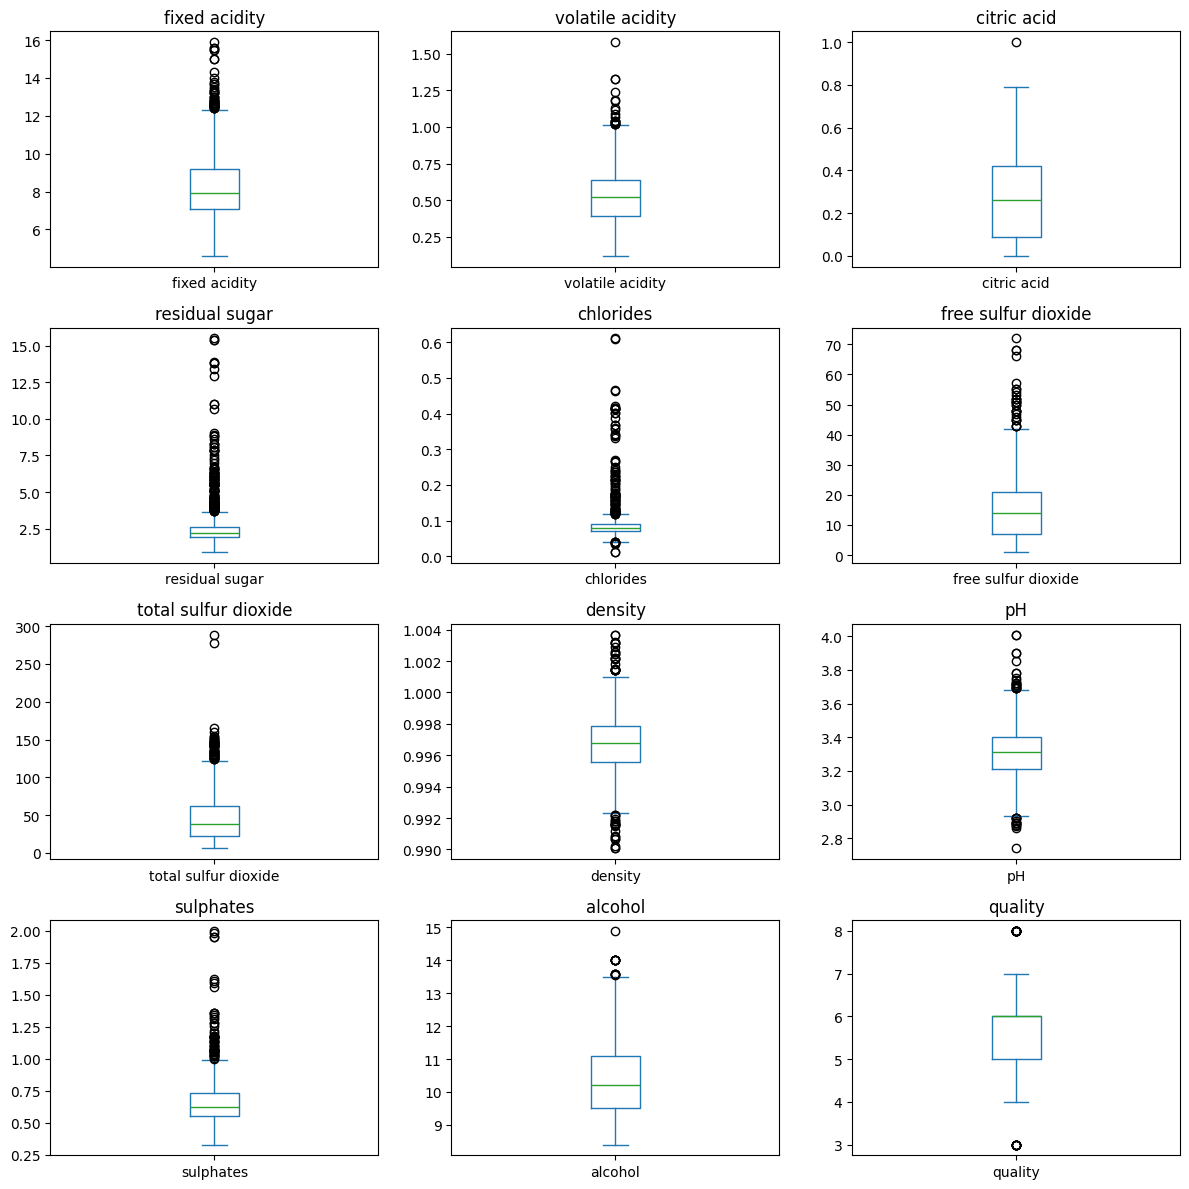

In [14]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(12, 12), dpi=100)  

for i, ax in enumerate(axes.flatten()):
    data.iloc[:, i].plot(kind='box', ax=ax)
    ax.set_title(data.columns[i])

plt.tight_layout()
plt.show()

### Visualizing Data-Multivariate 

#### Correlation Matrix

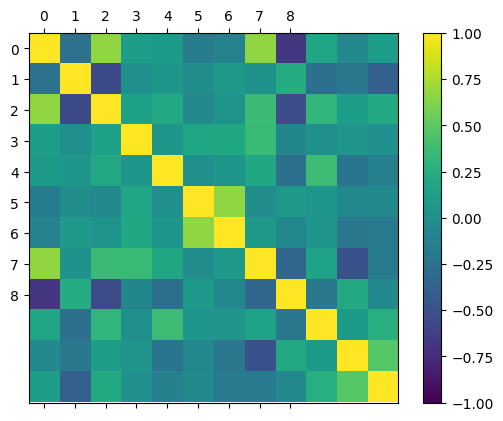

In [15]:
correlations= data.corr()
fig=plt.figure()
ax=fig.add_subplot(111)
cax=ax.matshow(correlations,vmin=-1,vmax=1)
fig.colorbar(cax)

ticks=np.arange(0,9,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
plt.show()

#### Scatterplot Matrix

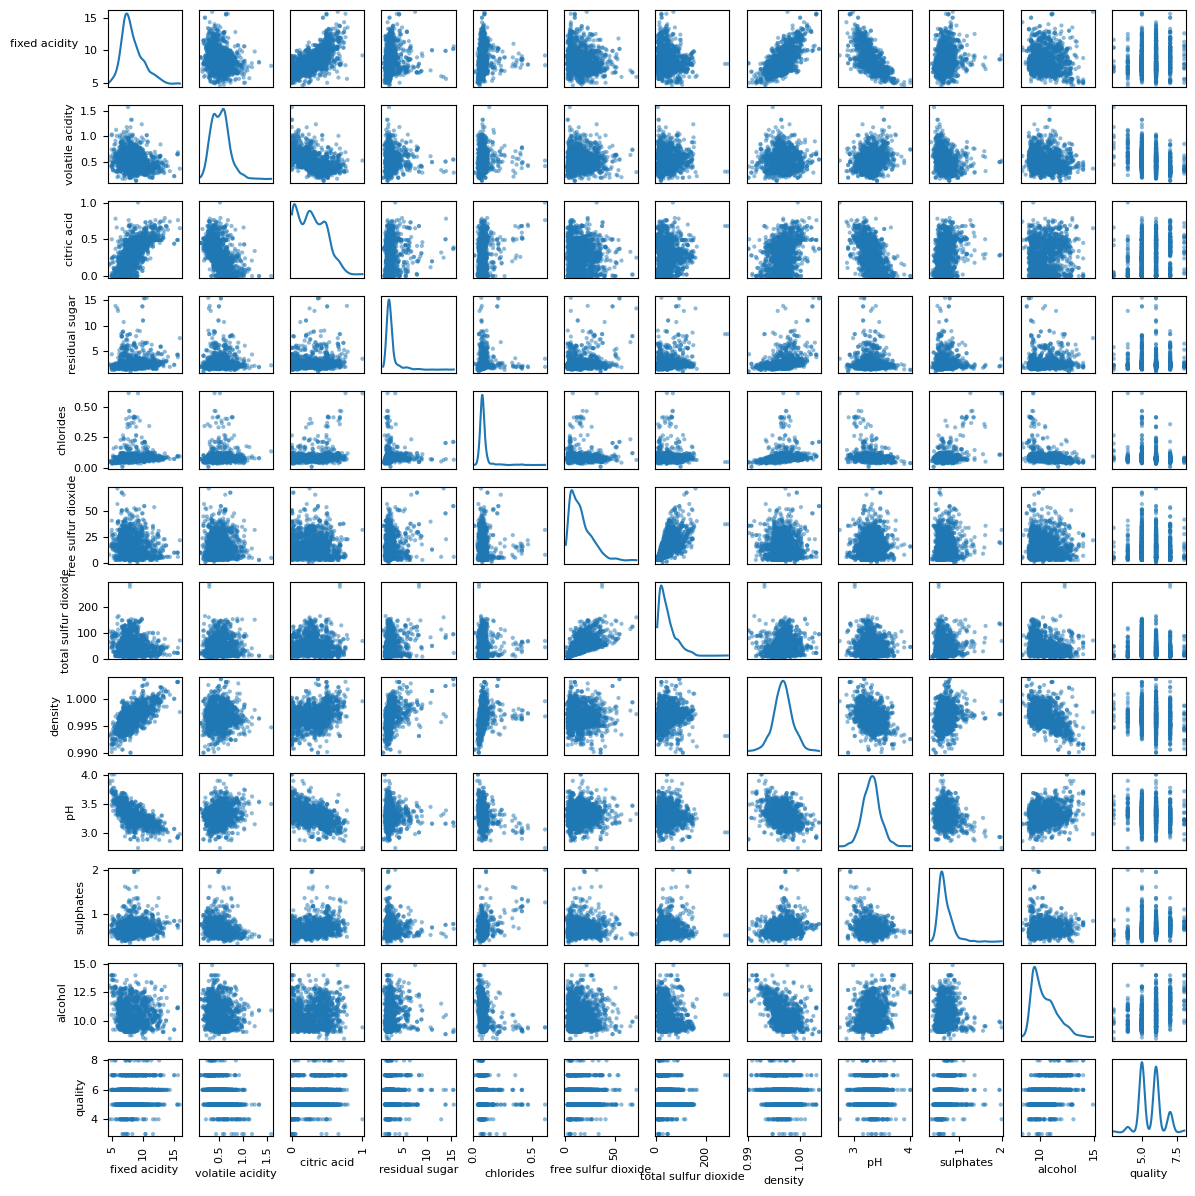

In [16]:
plt.rcParams['font.size'] = 8
scatter_matrix = pd.plotting.scatter_matrix(data, figsize=(12, 12), diagonal='kde')  # Ajuste o tamanho conforme necessário

for i in range(len(data.columns)):
    ax = scatter_matrix[i, i]
    ax.yaxis.label.set_rotation(0)
    ax.yaxis.label.set_ha('right')

plt.tight_layout()
plt.show()